In [1]:
 # Step 1: Download the data from Yahoo Finance
# Step 2: Some feature Engineering ( To build new Feature)- Technical Indicators
# step 3: Run linear Regression Model
# step 4: Check how the model is performed(Actual Vs Predicted)
# Step 5: Test for all The assumptions
# Step 6: Do the Prediction

In [2]:
import yfinance as yf

In [3]:
# Styep 1: Download The Data
tickers =['AAPL', 'AMZN', 'MSFT','QQQ','^GSPC']
df=yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']
df

C:\Users\Rohit Kamate\AppData\Local\Temp\ipykernel_22088\4213695129.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468254,94.900497,152.505707,208.848984,3257.850098
2020-01-03,71.763725,93.748497,150.606720,206.935928,3234.850098
2020-01-06,72.335556,95.143997,150.996017,208.269272,3246.280029
2020-01-07,71.995354,95.343002,149.619263,208.240280,3237.179932
2020-01-08,73.153496,94.598503,152.002472,209.805435,3253.050049
...,...,...,...,...,...
2024-12-23,254.120682,225.059998,432.062775,520.901855,5974.069824
2024-12-24,257.037506,229.050003,436.112885,527.965210,6040.040039
2024-12-26,257.853760,227.050003,434.901825,527.606567,6037.589844


In [4]:
# Step 2: Perform Feature Engineering
#  We have to consider yesterday's price of all stocks
df['AAPL(t-1)']= df['AAPL'].shift(1)
df['AMZN(t-1)']= df['AMZN'].shift(1)
df['MSFT(t-1)']= df['MSFT'].shift(1)
df['QQQ(t-1)']= df['QQQ'].shift(1)
df['^GSPC(t-1)']= df['^GSPC'].shift(1)

# Moving Average(MA): 
df['AAPL_MA_5']= df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5']= df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5']= df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5']= df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5']= df['^GSPC'].rolling(window=5).mean()

df['Target']= df['AAPL'].shift(-1)

df=df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.153496,94.598503,152.002472,209.805435,3253.050049,71.995354,95.343002,149.619263,208.240280,3237.179932,72.343277,94.746899,151.146036,208.419980,3245.842041,74.707336
2020-01-09,74.707336,95.052498,153.901428,211.583237,3274.699951,73.153496,94.598503,152.002472,209.805435,3253.050049,72.791093,94.777299,151.425180,208.966830,3249.212012,74.876198
2020-01-10,74.876198,94.157997,153.189346,211.042175,3265.350098,74.707336,95.052498,153.901428,211.583237,3274.699951,73.413588,94.859200,151.941705,209.788080,3255.312012,76.475914
2020-01-13,76.475914,94.565002,155.031281,213.476959,3288.129883,74.876198,94.157997,153.189346,211.042175,3265.350098,74.241660,94.743401,152.748758,210.829617,3263.681982,75.443237
2020-01-14,75.443237,93.472000,153.939407,212.636383,3283.149902,76.475914,94.565002,155.031281,213.476959,3288.129883,74.931236,94.369200,153.612787,211.708838,3272.875977,75.119911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,253.344193,224.919998,433.402924,515.875854,5930.850098,248.665344,223.289993,433.829742,511.409973,5867.080078,250.238235,226.561996,440.166992,521.837671,5958.956055,254.120682
2024-12-23,254.120682,225.059998,432.062775,520.901855,5974.069824,253.344193,224.919998,433.402924,515.875854,5930.850098,251.080426,224.987997,436.922931,518.961816,5938.954004,257.037506
2024-12-24,257.037506,229.050003,436.112885,527.965210,6040.040039,254.120682,225.059998,432.062775,520.901855,5974.069824,252.020181,224.567999,433.919086,517.970093,5936.840039,257.853760


In [5]:
#  Set X and Y variable for linear Regression model- OLS

import statsmodels.api as sm

X= df[['AAPL(t-1)','^GSPC(t-1)']]

Y= df['Target']

X_const= sm.add_constant(X)

# Train The Model
model =sm.OLS(Y, X_const).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:28:45   Log-Likelihood:                -3420.7
No. Observations:                1252   AIC:                             6847.
Df Residuals:                    1249   BIC:                             6863.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7172      0.748     -0.959      0.338      -2.185       0.750
AAPL(t-1)      0.9840      0.007    140.621      0.000       0.970       0.998
^GSPC(t-1)     0.0008      0.000      2.114      0.035     5.8e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.864
Skew:                          -0.036   Prob(JB):                     2.79e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
df.describe()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,151.755704,146.762099,287.218640,338.717340,4260.240249,151.609982,146.659538,286.996788,338.467857,4258.056814,151.462009,146.552817,286.769228,338.212302,4255.825685,151.897805
std,41.602769,31.810663,81.076424,78.465391,764.350333,41.562316,31.769219,81.072616,78.383174,763.363782,41.448517,31.598386,80.949682,78.172700,761.068015,41.637903
min,54.264324,81.820000,128.929947,163.573898,2237.399902,54.264324,81.820000,128.929947,163.573898,2237.399902,57.598991,83.616000,133.756982,169.351614,2359.427979,54.264324
25%,126.969431,121.128250,228.038086,283.262466,3821.500061,126.608786,121.092251,227.949081,283.213272,3820.942566,126.405261,120.700849,227.406201,282.319559,3825.771484,127.096943
50%,150.290359,153.951500,275.303299,328.180832,4205.485107,150.247231,153.872498,274.824280,327.844864,4204.880127,150.000023,153.948351,275.556747,328.821637,4208.747021,150.321693
75%,176.124954,170.000000,331.687798,380.705597,4602.930176,176.057953,169.979000,331.656326,380.541534,4597.927490,175.913733,169.732375,330.167627,381.203781,4591.180981,176.332718
max,257.853760,232.929993,462.375580,535.281128,6090.270020,257.853760,232.929993,462.375580,535.281128,6090.270020,255.359073,230.153998,458.926270,529.327258,6070.920020,257.853760


In [7]:
import pandas as pd
df_train_predict= pd.DataFrame()
df_train_predict['Actual']= df['Target']
df_train_predict['Predicted']= model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.707336,72.734134
2020-01-09,74.876198,73.886537
2020-01-10,76.475914,75.432966
2020-01-13,75.443237,75.591596
2020-01-14,75.119911,77.184077
...,...,...
2024-12-20,254.120682,248.697013
2024-12-23,257.037506,253.352399
2024-12-24,257.853760,254.151281


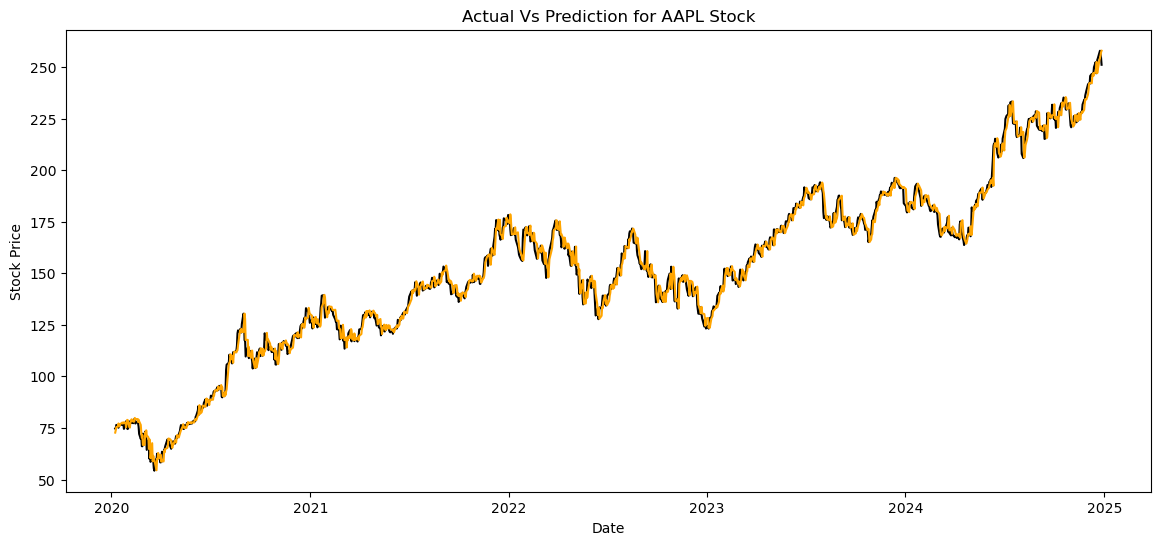

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize= (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'],label='Actual', color= 'black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'],label='Predicted', color= 'orange')
plt.title("Actual Vs Prediction for AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [9]:
# Linear Regression 
# Step 1: Train The Model
# Step 2: Test The Model

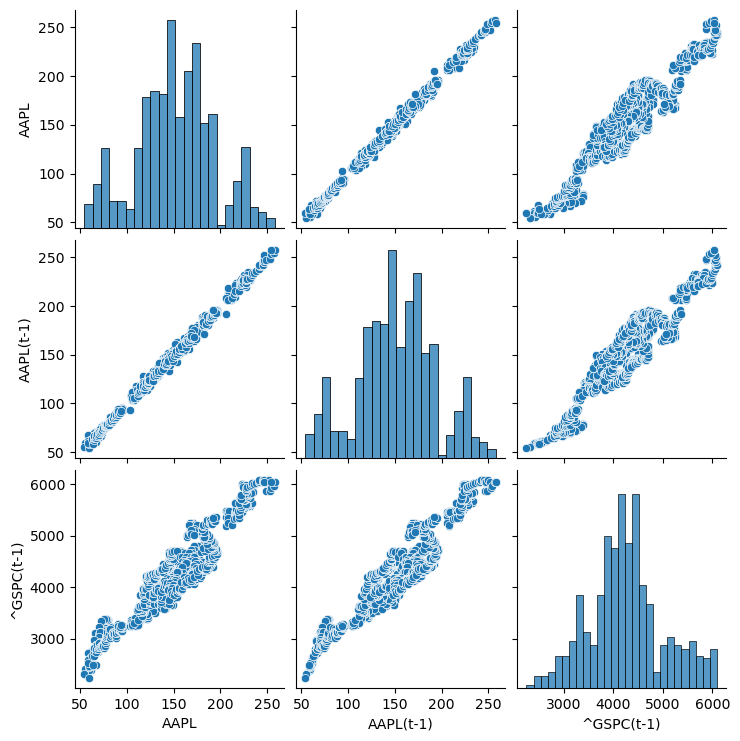

In [10]:
# Assumptions of Linear regression:
# 1) Linearity between dependent and independent variable
import seaborn as sns
df=df[['AAPL','AAPL(t-1)','^GSPC(t-1)']]
sns.pairplot(df)

#  AAPL & AAPL(t-1) has linear relationship
#  AAPl & AAPL_ MA_5 has linear relationship

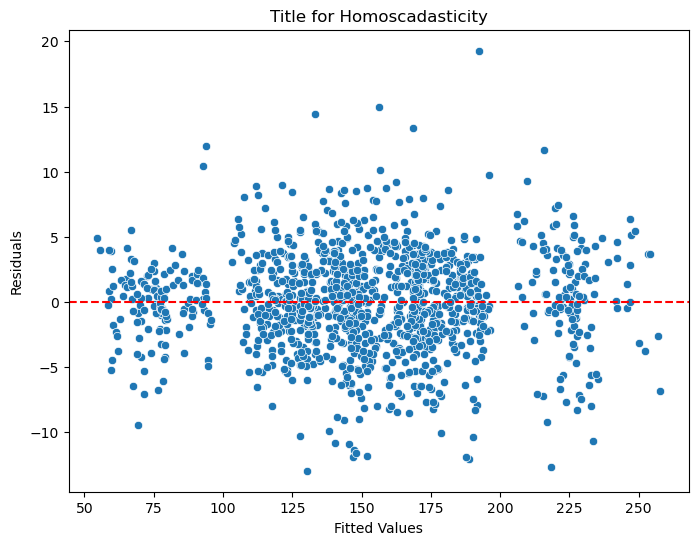

In [11]:
# Homoscadasticity
residual= model.resid
fitted =model.fittedvalues
fitted

plt.figure(figsize=(8,6))
sns.scatterplot(x= fitted, y=residual)
plt.axhline(0, color='red', linestyle ='--')
plt.title('Title for Homoscadasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [12]:
# Since it's a tube like structuire =>> It is Homoscadastic

In [13]:
#  Multi-Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features']= X_const.columns
vif['VIF']= [variance_inflation_factor(X_const.values, i) for i in range (X_const.shape[1])]
vif = vif[1:]
vif

,Features,VIF
1,AAPL(t-1),7.634911
2,^GSPC(t-1),7.634911


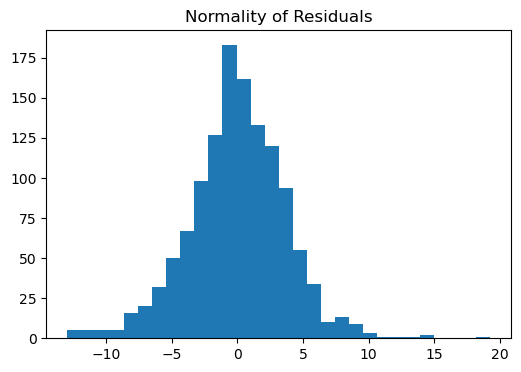

In [14]:
# Normality of residual
plt.figure(figsize=(6,4))
plt.hist(residual, bins = 30)
plt.title("Normality of Residuals")
plt.show()

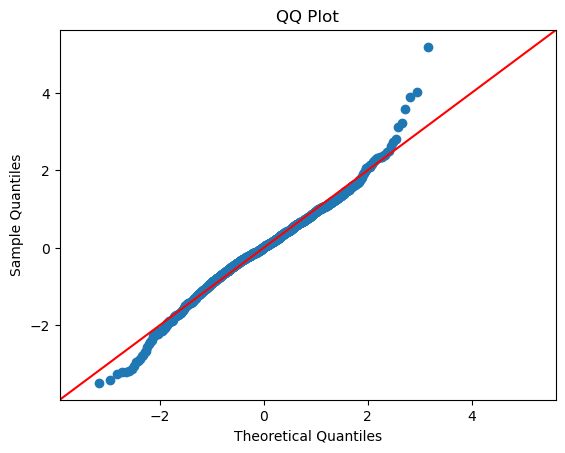

In [15]:
import statsmodels.api as sm
sm.qqplot(residual, line= '45', fit=True)
plt.title('QQ Plot')
plt.show()

In [16]:
# Auto-correlation
from statsmodels.stats.stattools import durbin_watson
dw= durbin_watson(residual)
dw

1.041007783806478

In [17]:
# p value < 0.05 ==> Autocorrelation b/w residual is there
# p value > 0.05 ==> Autocorrelation b/w residual is not there

In [18]:
# All the 5 conditions of Linear Regression Modela are MET
# Linearity
# Homoscedasticity
# VIF
# Normality of Residuals
# Auto correlation of Residual

In [19]:
# Predict the Stock Price for the Year 2025

In [20]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', '^GSPC']
df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
df.head()

C:\Users\Rohit Kamate\AppData\Local\Temp\ipykernel_22088\2471956868.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,242.752106,5868.549805
2025-01-03,242.264297,5942.470215
2025-01-06,243.896912,5975.379883
2025-01-07,241.119476,5909.029785
2025-01-08,241.607269,5918.250000


In [21]:
# Step 2: Data Eng
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.264297,5942.470215,242.752106,5868.549805
2025-01-06,243.896912,5975.379883,242.264297,5942.470215
2025-01-07,241.119476,5909.029785,243.896912,5975.379883
2025-01-08,241.607269,5918.250000,241.119476,5909.029785
2025-01-10,235.783615,5827.040039,241.607269,5918.250000


In [22]:
X_test = df[['AAPL(t-1)', '^GSPC(t-1)']]
X_test = sm.add_constant(X_test)
df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(X_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.264297,242.879524
2025-01-06,243.896912,242.459055
2025-01-07,241.119476,244.092067
2025-01-08,241.607269,241.305608
2025-01-10,235.783615,241.793026


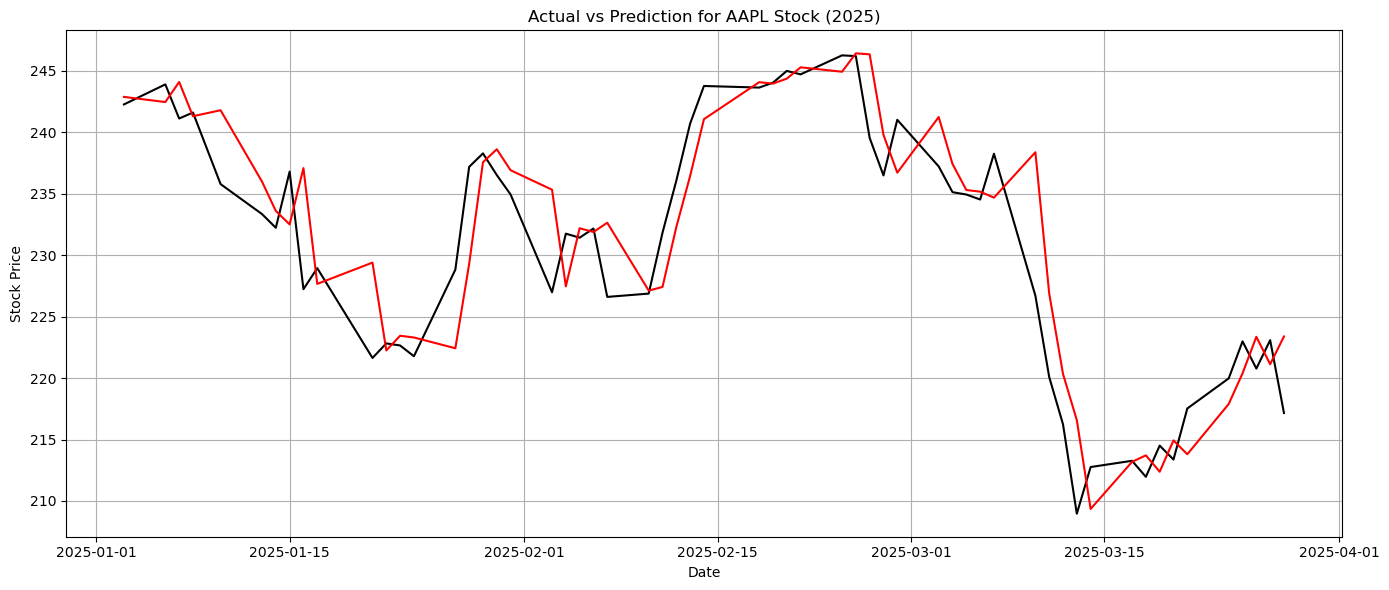

In [23]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Risk Metrics
# Calculate rmse and mse
# rmse = root mean square error => Sq root(Avg((A - P)^2))
# mse = mean square error => Avg((A - P)^2)
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate mse
mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)


4.151408351966308 17.234191304775617


In [25]:
# Conclusion: It's a decent Model but not 100% Accurate
# Lesson: Stock data in general have lot of non linearities
# It's extremely tough to use simple linear regression model just to capture the non-linear effect
# That's why in the industry it's common to use ML Models which are great in capturing Non- Linearities.

## Lasso Regression

In [26]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df

C:\Users\Rohit Kamate\AppData\Local\Temp\ipykernel_22088\2544174855.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.468246,94.900497,152.505692,208.848938,3257.850098
2020-01-03,71.763733,93.748497,150.606720,206.935898,3234.850098
2020-01-06,72.335548,95.143997,150.996017,208.269241,3246.280029
2020-01-07,71.995354,95.343002,149.619278,208.240280,3237.179932
2020-01-08,73.153496,94.598503,152.002457,209.805466,3253.050049
...,...,...,...,...,...
2025-03-25,222.987503,205.710007,393.052887,492.335663,5776.649902
2025-03-26,220.775055,201.130005,387.890564,483.276367,5712.200195
2025-03-27,223.087158,201.360001,388.497284,480.522644,5693.310059


In [27]:
# Step 2: Perform Feature Engineering
# Lesson: To predict AAPL Stock price, we have to consider yesterday's p
# The market is not open yet so we don't know what's the price today
# Considering Yesterday's Value
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
# Moving Avg (MA): Technical Indicator 
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()
# Set Y Variable - Next day
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.153496,94.598503,152.002457,209.805466,3253.050049,71.995354,95.343002,149.619278,208.240280,3237.179932,72.343275,94.746899,151.146033,208.419965,3245.842041,74.707344
2020-01-09,74.707344,95.052498,153.901413,211.583252,3274.699951,73.153496,94.598503,152.002457,209.805466,3253.050049,72.791095,94.777299,151.425177,208.966827,3249.212012,74.876221
2020-01-10,74.876221,94.157997,153.189331,211.042191,3265.350098,74.707344,95.052498,153.901413,211.583252,3274.699951,73.413593,94.859200,151.941699,209.788086,3255.312012,76.475906
2020-01-13,76.475906,94.565002,155.031281,213.476944,3288.129883,74.876221,94.157997,153.189331,211.042191,3265.350098,74.241664,94.743401,152.748752,210.829626,3263.681982,75.443230
2020-01-14,75.443230,93.472000,153.939407,212.636353,3283.149902,76.475906,94.565002,155.031281,213.476944,3288.129883,74.931239,94.369200,153.612778,211.708841,3272.875977,75.119926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,219.977783,203.259995,390.983948,489.542053,5767.569824,217.526184,196.210007,389.173676,479.030029,5667.560059,215.469208,196.556000,386.432367,479.572351,5677.594043,222.987503
2025-03-25,222.987503,205.710007,393.052887,492.335663,5776.649902,219.977783,203.259995,390.983948,489.542053,5767.569824,217.673669,199.134000,388.747955,483.488727,5709.991992,220.775055
2025-03-26,220.775055,201.130005,387.890564,483.276367,5712.200195,222.987503,205.710007,393.052887,492.335663,5776.649902,218.927383,200.252002,389.175665,484.328021,5717.374023,223.087158


In [28]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Lasso Regression
# Step 5: Get Intercept and Coeff for Lasso Regression
# Step 6: Predict using Lasso Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [29]:
#  Step 1: Import all the required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
 # Step 2: Define Features and Target Varioables
X=df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [31]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle =False)

In [32]:
# Step 4: Apply Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train) # Train the model

Lasso(alpha=10)

In [33]:
# Step 5: Get Intercept and Coeff for Lasso Regression
coefficients = lasso.coef_
coefficients
intercept = lasso.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.572383
1,AMZN(t-1),-0.000000
2,MSFT(t-1),0.005861
3,QQQ(t-1),0.000000
4,^GSPC(t-1),0.002477
5,AAPL_MA_5,0.367689
6,AMZN_MA_5,-0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,0.000000


In [34]:
# Step 6: Predict using Lasso Regression
y_pred = lasso.predict(X_test)
y_pred

array([248.6080406 , 251.7512684 , 252.64046138, 255.30022841,
       256.17888731, 253.84736445, 251.36921063, 249.22237621,
       244.28295141, 243.43934866, 243.75020271, 241.39904314,
       241.20138312, 236.95350324, 234.71199098, 233.76382644,
       235.64909237, 229.6291212 , 229.9211144 , 225.17410273,
       225.00686349, 224.59191171, 224.0230041 , 228.92507597,
       235.05917133, 236.60705323, 236.48613962, 235.36923037,
       230.27883226, 232.6195438 , 232.17539761, 232.05945692,
       228.68826166, 228.96238343, 232.13917456, 235.13639156,
       239.2216485 , 242.19220242, 243.05989385, 244.01065243,
       244.79969918, 244.5184154 , 245.49237439, 245.02269805,
       240.59974751, 238.30627902, 240.48753163, 237.19084106,
       235.47775678, 235.45708239, 234.73822502, 236.15607674,
       227.97663188, 222.71052644, 218.7127328 , 212.45497181,
       213.98836517, 213.77244312, 212.71769144, 214.67147601,
       214.33507901, 217.24434479, 219.71650847, 221.93

In [35]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120667,248.608041
2024-12-23,257.037476,251.751268
2024-12-24,257.853760,252.640461
2024-12-26,254.439224,255.300228
2024-12-27,251.064484,256.178887
...,...,...
2025-03-24,222.987503,217.244345
2025-03-25,220.775055,219.716508
2025-03-26,223.087158,221.934818


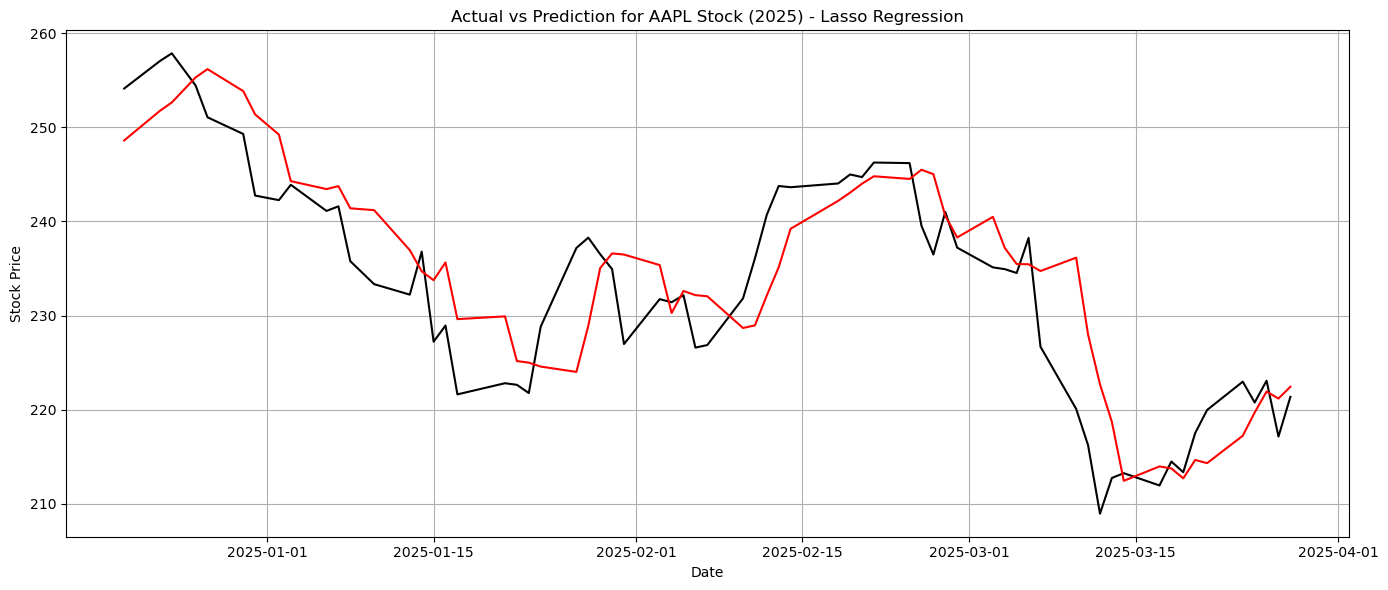

In [36]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color='red')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.759846907090527
mse 33.73912173156663
rmse 5.808538691578685


## Ridge Regression 

In [38]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Ridge Regression
# Step 5: Get Intercept and Coeff for Ridge Regression
# Step 6: Predict using Ridge Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [39]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']


In [41]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle =False)

In [42]:
# Step 4: Apply Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train) # Train the model

Ridge(alpha=10)

In [43]:
# Step 5: Get Intercept and Coeff for Lasso Regression
coefficients = ridge.coef_
coefficients
intercept = ridge.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df


,Feature,Coefficients
0,AAPL(t-1),0.450885
1,AMZN(t-1),0.054195
2,MSFT(t-1),-0.017327
3,QQQ(t-1),0.034630
4,^GSPC(t-1),0.004581
5,AAPL_MA_5,0.532345
6,AMZN_MA_5,-0.049370
7,MSFT_MA_5,0.029188
8,QQQ_MA_5,-0.035648
9,^GSPC_MA_5,-0.004918


In [44]:
# Step 6: Predict using Ridge Regression
y_pred = ridge.predict(X_test)
y_pred


array([248.81024093, 252.09462491, 253.3266591 , 256.17520033,
       256.83720401, 254.46458532, 252.01158503, 249.65414499,
       245.16070195, 244.50596304, 244.6263174 , 241.65105409,
       241.21502579, 237.08444399, 235.0278163 , 234.02698426,
       235.57913438, 229.95810117, 229.86221471, 225.75948627,
       224.83747306, 224.07494652, 223.47461658, 227.60083895,
       233.5432322 , 235.31353608, 236.39720457, 235.3173965 ,
       230.62470091, 232.46484393, 231.61344125, 231.42294385,
       227.88776197, 228.62585876, 231.35778395, 233.922329  ,
       238.24857136, 241.34824185, 242.4928963 , 243.58370085,
       244.29707694, 243.76447621, 244.67520404, 244.32650437,
       241.03557168, 238.32329251, 240.49348639, 236.82735962,
       235.21306442, 235.78161858, 234.41105833, 235.68345725,
       227.87180152, 223.17802489, 219.42276283, 212.78309464,
       213.95140844, 213.4589437 , 212.01236222, 214.01708522,
       213.88022983, 216.33513051, 219.42831201, 221.57

In [45]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120667,248.810241
2024-12-23,257.037476,252.094625
2024-12-24,257.853760,253.326659
2024-12-26,254.439224,256.175200
2024-12-27,251.064484,256.837204
...,...,...
2025-03-24,222.987503,216.335131
2025-03-25,220.775055,219.428312
2025-03-26,223.087158,221.579093


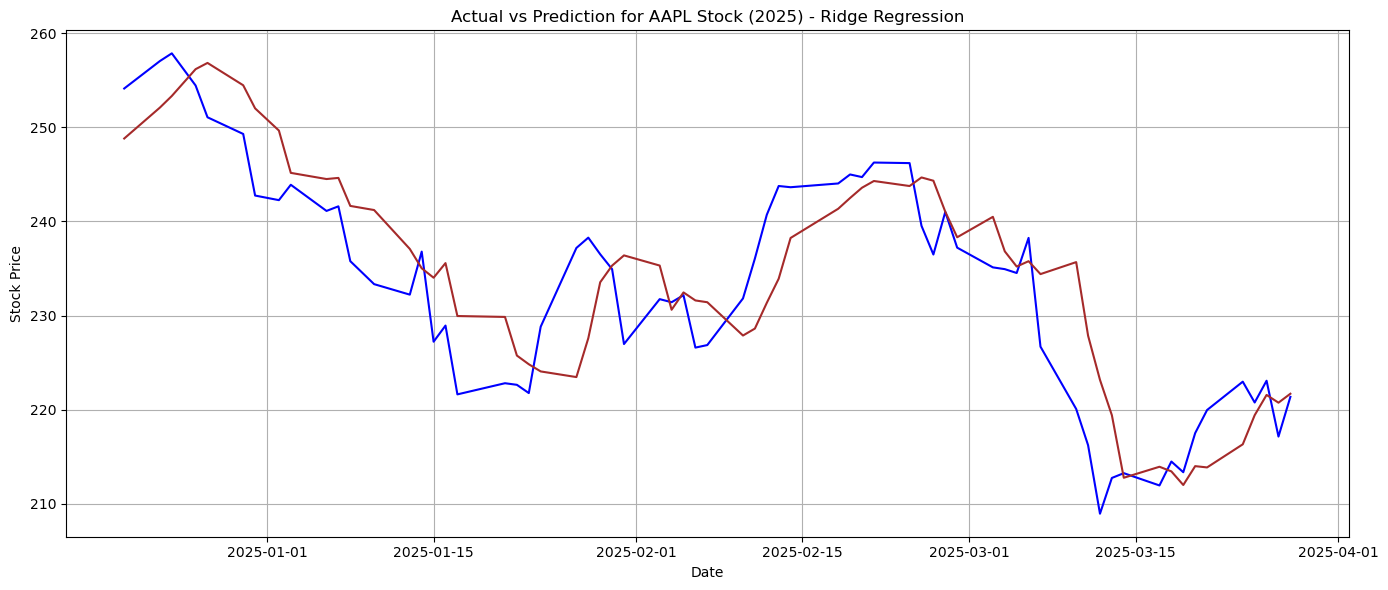

In [46]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='blue')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color='brown')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Ridge Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7443737973075364
mse 35.9129398082341
rmse 5.992740592436327


## Elastic Net Regression

In [48]:
# Step 1: Import all the required libraries
# Step 2: Define Features and Target Variables
# Step 3: Train Test Split
# Step 4: Apply Elastic Net Regression
# Step 5: Get Intercept and Coeff for Elastic Net Regression
# Step 6: Predict using Elastic Net Regression
# Step 7: Create a dataframe with Actual and Predicted Values
# Step 8: Plot Actual & Predicted Values
# Step 9: Evaluate the Model - R square, mse, rmse

In [49]:
# Step 1: Import all the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
# Step 2: Define Features and Target Variables
X = df[['AAPL(t-1)', 'AMZN(t-1)',
 'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [51]:
# Step 3: Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle =False)

In [52]:
# Step 4: Apply Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, Y_train) #Train the model
# l1_ratio = 0.5 => applying 50% lasso and 50% as ridge regression - alpha parameter

C:\Users\Rohit Kamate\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.435e+03, tolerance: 2.116e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [53]:
# Step 5: Get Intercept and Coeff for Elastic Net Regression
coefficients = elastic_net.coef_
coefficients
intercept = elastic_net.intercept_
intercept
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':coefficients})
coeff_df

,Feature,Coefficients
0,AAPL(t-1),0.529396
1,AMZN(t-1),0.000296
2,MSFT(t-1),0.010737
3,QQQ(t-1),0.002956
4,^GSPC(t-1),0.006578
5,AAPL_MA_5,0.447807
6,AMZN_MA_5,0.000000
7,MSFT_MA_5,0.000000
8,QQQ_MA_5,0.000000
9,^GSPC_MA_5,-0.006775


In [54]:
# Step 6: Predict using Elastic Net Regression
y_pred = elastic_net.predict(X_test)
y_pred

array([248.66149622, 252.07971163, 253.2107503 , 256.00832337,
       256.78621172, 254.26519126, 251.66915648, 249.46857738,
       244.61891716, 243.97321531, 244.22701278, 241.4946562 ,
       241.26929684, 236.84684686, 234.72691155, 233.72051171,
       235.67934402, 229.65981649, 229.69386041, 225.0038222 ,
       224.58924777, 224.01062016, 223.362788  , 227.72997121,
       234.12774819, 235.77196794, 236.02408227, 234.8430431 ,
       229.82696538, 232.0274907 , 231.61746184, 231.46733799,
       227.94816561, 228.36810589, 231.42005554, 234.249681  ,
       238.57902594, 241.59521105, 242.63174703, 243.70465268,
       244.5484489 , 243.99587406, 245.01829309, 244.57034965,
       240.6604764 , 238.05212101, 240.50203046, 236.92528124,
       235.08436688, 235.55210651, 234.56637169, 236.09686863,
       227.69261432, 222.56553088, 218.75922741, 212.21601677,
       213.8524385 , 213.58437258, 212.15681369, 214.16939394,
       213.85880531, 216.61724317, 219.39328096, 221.58

In [55]:
# Step 7: Create a dataframe with Actual and Predicted Values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2024-12-20,254.120667,248.661496
2024-12-23,257.037476,252.079712
2024-12-24,257.853760,253.210750
2024-12-26,254.439224,256.008323
2024-12-27,251.064484,256.786212
...,...,...
2025-03-24,222.987503,216.617243
2025-03-25,220.775055,219.393281
2025-03-26,223.087158,221.588954


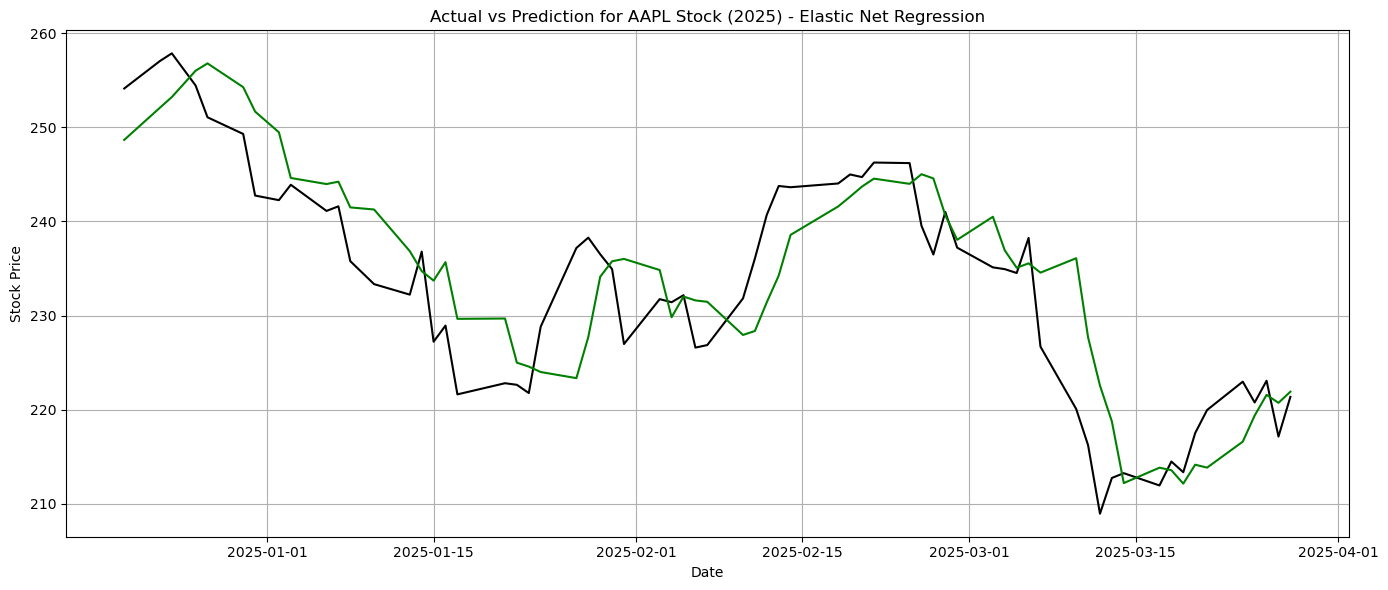

In [56]:
# Step 8: Plot Actual & Predicted Values
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color ='black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color ='green')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Elastic Net Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Step 9: Evaluate the Model - R square, mse, rmse
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test, y_pred)
print("R square", r2)
mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)
rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7513318004804868
mse 34.935409545281
rmse 5.9106183724954695


In [58]:
# Performance for All our Models


In [59]:
# OLS
# R-squared:0.992
# mse  17.23421028658259
# rmse 4.151410638154529

In [60]:
# Lasso Regression
# R square 0.7598467383930432
# mse 33.739153625695295
# rmse 5.808541437030065

In [61]:
# Ridge Regression
# R square 0.7443735705449508
# mse 35.91298038786257
# rmse 5.992743978167478

In [62]:
# Elastic Net Regression
# R square 0.7513316374187404
# mse 34.93544093817202
# rmse 5.910621028129956